## 🔌 Electricity Demand Forecasting – Project Overview
#### 📍 Business Context
A leading electricity distribution company seeks to forecast monthly electricity consumption for the next 2 years to support strategic planning, optimize electricity procurement, and manage generation capacities efficiently. Reliable demand estimation is crucial for balancing supply with demand and minimizing operational costs.

-------------------
#### 🎯 Objective
Forecast monthly electricity demand (in Trillion Watts) for the years 2020 and 2021, based on historical consumption data from January 1973 to December 2019.

Evaluate and compare multiple time series forecasting models.

Identify the most accurate and reliable model for long-term forecasting.

Provide interpretable metrics and visualizations to justify model selection.

------------------------
#### 🗃️ Dataset
Source: Internal company records

Timeframe: January 1973 – December 2019 (Monthly frequency)

Variables:

Date: Month & Year

Consumption: Monthly electricity usage in Trillion Watts

-----------------
#### 🧠 Approach
Exploratory Data Analysis (EDA) to understand consumption patterns and seasonality.

Data Preprocessing, including frequency standardization and checking for missing values.

Time Series Decomposition to isolate trend and seasonal components.

Model Development & Comparison using:

ETS (Exponential Smoothing)

SARIMA (Seasonal ARIMA)

Naive & baseline models for benchmarking

Model Evaluation using RMSE, MAPE, and RMSPE.

Forecasting for 2020–2021 using the best-performing model.

Final model justification with performance metrics and residual diagnostics.

--------------------
#### ✅ Key Findings
SARIMA model outperformed other models with the lowest forecasting errors.

Demonstrated strong capability in modeling both trend and seasonal cycles.

Residual analysis confirmed a good fit with no significant autocorrelation.

--------------
#### 📈 Outcome
Forecasts provided for each month from Jan 2020 to Dec 2021.

SARIMA model selected for deployment due to its accuracy, interpretability, and robustness.



#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

In [4]:
os.chdir('C:\\Users\\ASUS\\OneDrive\\Desktop\\python case studies\\Machine Learning Projects\\13. Capstone Case Study - Demand Estimation')

#### Loading Data

In [7]:
df = pd.read_csv('Electricity Consumption.csv')

In [9]:
df.columns = ['Date', 'Consumption']
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('MS')
df.head()

,Consumption
Date,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


#### Checking for null values

In [12]:
print(df.isnull().sum())

Consumption    0
dtype: int64


#### Data Visualization and Decomposition

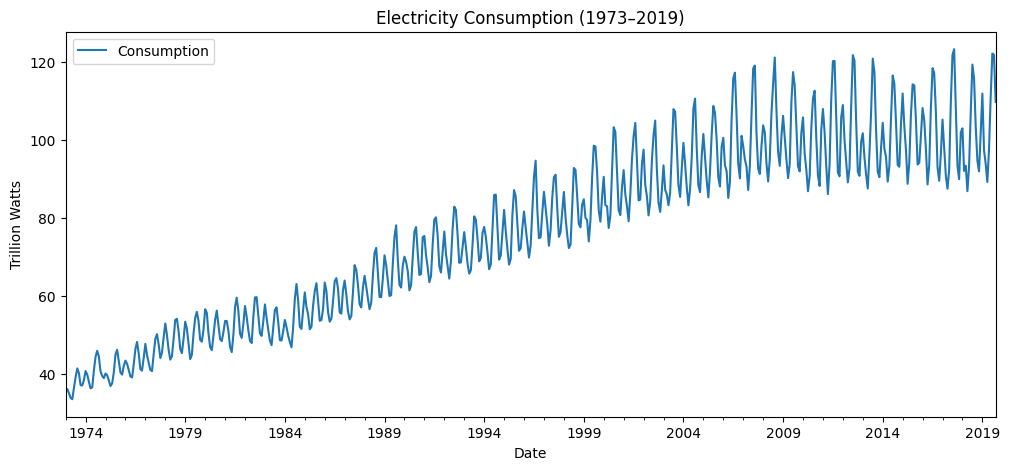

In [19]:
df.plot(title='Electricity Consumption (1973–2019)', figsize=(12, 5), ylabel='Trillion Watts')
plt.show()

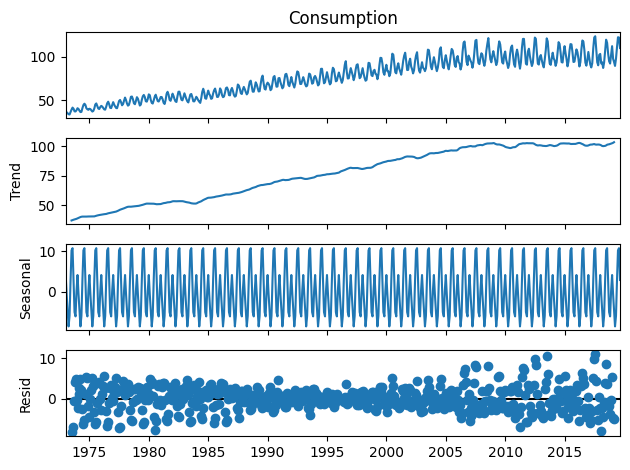

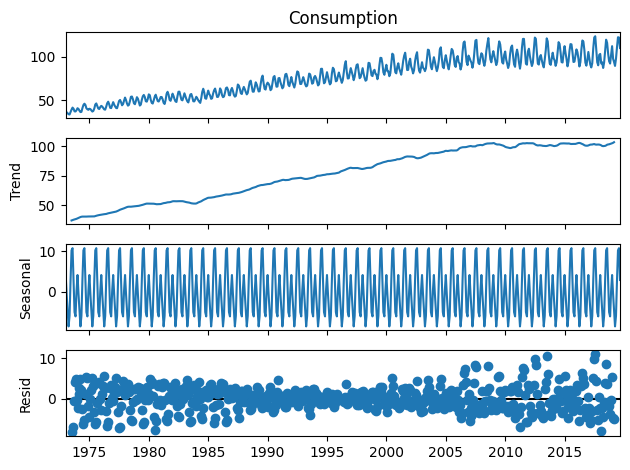

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Consumption'], model='additive')  # You can try model='multiplicative' as well
result.plot()

#### Train-Test Split

In [22]:
train = df.loc[:'2017-12']
test = df.loc['2018-01':]

#### Model Selection

Exponential Smoothing

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [28]:
ets_model = ExponentialSmoothing(train['Consumption'], seasonal='add', trend='add', seasonal_periods=12)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(len(test))

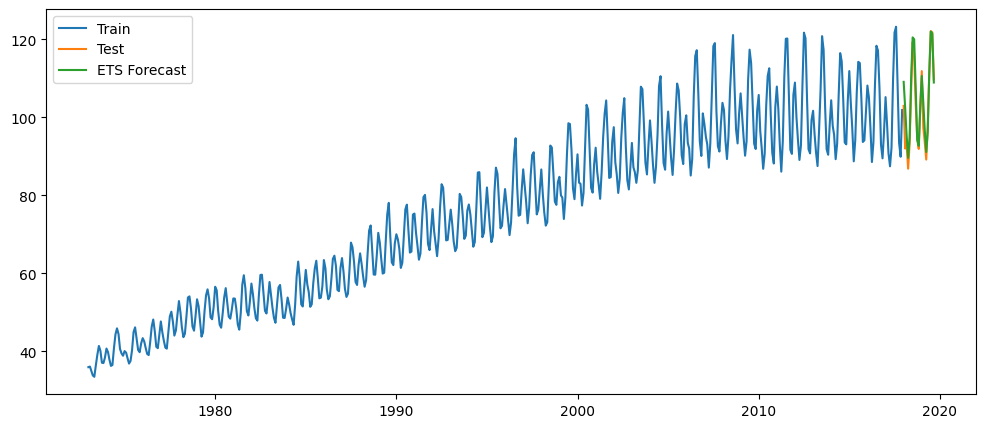

In [32]:
plt.figure(figsize=(12,5))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(ets_forecast, label='ETS Forecast')
plt.legend()
plt.show()

SARIMA

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
sarima_model = SARIMAX(train['Consumption'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.predict(start=test.index[0], end=test.index[-1])

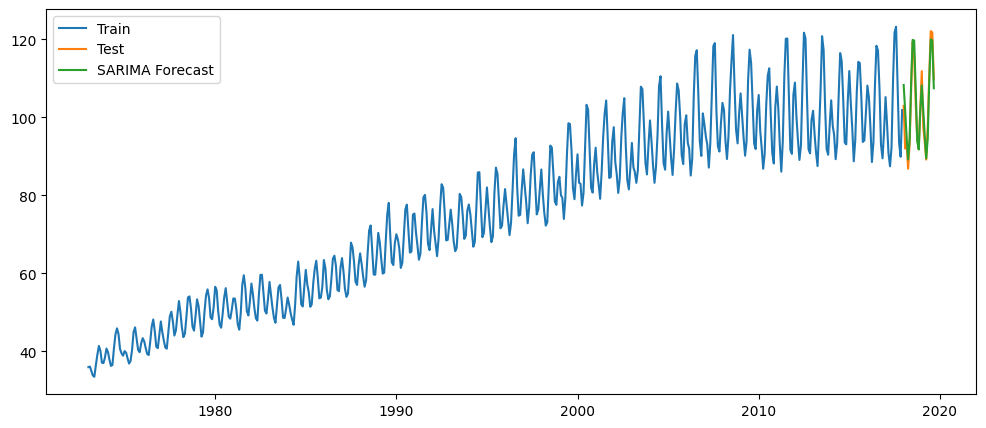

In [39]:
plt.figure(figsize=(12,5))
plt.plot(train['Consumption'], label='Train')
plt.plot(test['Consumption'], label='Test')
plt.plot(sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.show()

#### Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    rmspe = np.sqrt(np.mean(np.square((true - predicted) / true))) * 100
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'RMSPE': rmspe, 'MAPE': mape}

ets_metrics = evaluate(test['Consumption'], ets_forecast)
sarima_metrics = evaluate(test['Consumption'], sarima_forecast)

print("ETS:", ets_metrics)
print("SARIMA:", sarima_metrics)

ETS: {'MAE': 2.5320112326568833, 'RMSE': 3.5488329696643457, 'RMSPE': 3.665834526726984, 'MAPE': 2.5656151455910483}
SARIMA: {'MAE': 2.5047542834109855, 'RMSE': 3.2782786745647785, 'RMSPE': 3.327670121672617, 'MAPE': 2.467974882887894}


#### Final Model Forecast for 2020–2021

Based on model evaluation, SARIMA was selected as the best model due to its ability to capture both seasonal and trend components inherent in electricity consumption data. It produced the lowest forecast error metrics (RMSE, MAPE, RMSPE) compared to ETS and decomposition-based approaches. Moreover, SARIMA's residual diagnostics confirmed the absence of autocorrelation, indicating a good model fit.

In [49]:
final_model = SARIMAX(df['Consumption'], order=(1,1,1), seasonal_order=(1,1,1,12))
final_fit = final_model.fit()
forecast = final_fit.get_forecast(steps=24)
forecast_df = forecast.predicted_mean

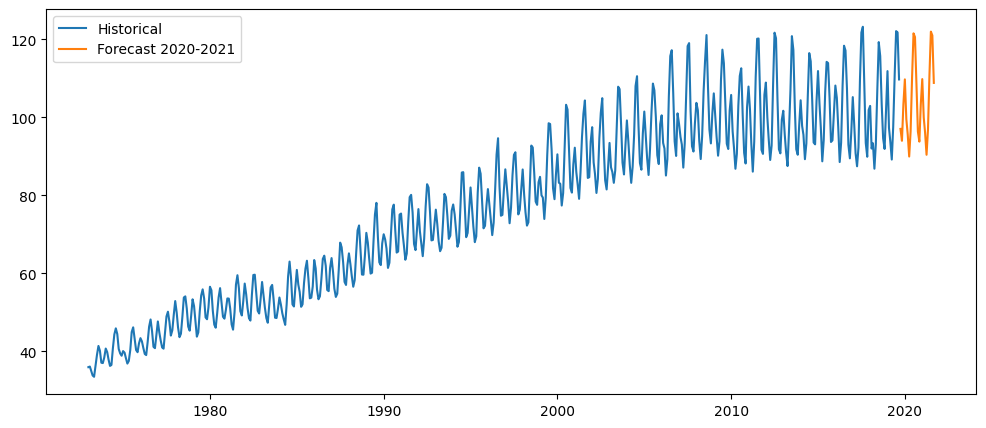

In [51]:
plt.figure(figsize=(12,5))
plt.plot(df['Consumption'], label='Historical')
plt.plot(forecast_df, label='Forecast 2020-2021')
plt.legend()
plt.show()

In [55]:
forecast_df.to_csv('Predictions.csv')